# Actualisation des données sur l'agriculture française

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#installer ceci au prealables
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.basemap import __version__ as basemap_version
from mpl_toolkits.basemap import Basemap
import folium
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
import pickle

# Afficher la version de chaque bibliothèque
print(f"pandas version: {pd.__version__} (Open source)")
print(f"numpy version: {np.__version__} (Open source)")
print(f"matplotlib version: {mpl.__version__} (Open source)")
print(f"seaborn version: {sns.__version__} (Open source)")
print(f"plotly version: {pl.__version__} (Open source)")
print(f"mpl_toolkits.basemap version: {basemap_version} (Open source)")
print(f"folium version: {folium.__version__} (Open source)")
print(f"pickle version: {pickle.format_version} (Open source)")
print(f"scikit-learn version: {sklearn_version} (Open source)")

# Modèles de régression
print(f"sklearn.linear_model version: {LinearRegression().fit.__module__.split('.')[0]} (Open source)")
print(f"sklearn.ensemble version: {RandomForestRegressor().fit.__module__.split('.')[0]} (Open source)")
print(f"sklearn.linear_model version: {Ridge().fit.__module__.split('.')[0]} (Open source)")
print(f"sklearn.linear_model version: {Lasso().fit.__module__.split('.')[0]} (Open source)")
print(f"sklearn.linear_model version: {BayesianRidge().fit.__module__.split('.')[0]} (Open source)")

# Prétraitement des données
print(f"sklearn.impute version: {SimpleImputer().__module__.split('.')[0]} (Open source)")
print(f"sklearn.preprocessing version: {OneHotEncoder().__module__.split('.')[0]} (Open source)")
print(f"sklearn.preprocessing version: {StandardScaler().__module__.split('.')[0]} (Open source)")
print(f"sklearn.preprocessing version: {PolynomialFeatures().__module__.split('.')[0]} (Open source)")


pandas version: 1.5.3 (Open source)
numpy version: 1.22.4 (Open source)
matplotlib version: 3.7.1 (Open source)
seaborn version: 0.12.2 (Open source)
plotly version: 5.13.1 (Open source)
mpl_toolkits.basemap version: 1.3.7 (Open source)
folium version: 0.14.0 (Open source)
pickle version: 4.0 (Open source)
scikit-learn version: 1.2.2 (Open source)
sklearn.linear_model version: sklearn (Open source)
sklearn.ensemble version: sklearn (Open source)
sklearn.linear_model version: sklearn (Open source)
sklearn.linear_model version: sklearn (Open source)
sklearn.linear_model version: sklearn (Open source)
sklearn.impute version: sklearn (Open source)
sklearn.preprocessing version: sklearn (Open source)
sklearn.preprocessing version: sklearn (Open source)
sklearn.preprocessing version: sklearn (Open source)


In [3]:
df_rga = pd.read_excel('/content/drive/MyDrive/dataviz/rga-2020-dataviz-challenge-copie.xlsx')
df_rga.head(4)

echelle            categorie  \
0  Amikuze  Statut exploitation   
1  Amikuze                 Otex   
2  Amikuze                 Otex   
3  Amikuze                 Otex   

                                              type   annee  valeur  \
0                                   autres statuts  2010.0    28.0   
1  combinaisons de granivores (porcins, volailles)  2010.0    27.0   
2                                    bovins viande  2020.0   120.0   
3                                          porcins  2020.0    11.0   

   sau_tot_ha  sau_moy_ha   sau_ha       ugb         etp  ...  bio surface  \
0         NaN         NaN  1092.09  2887.083   39.175221  ...  NaN     NaN   
1         NaN         NaN   938.21  2117.184   41.256737  ...  NaN     NaN   
2         NaN         NaN  5493.60  8951.947  150.016349  ...  NaN     NaN   
3         NaN         NaN   237.50  2890.370   23.952778  ...  NaN     NaN   

   irrigation  nombre_exploitation_bio  surface_bio  otefdd_coef17  \
0         NaN                      NaN          NaN            NaN   
1         NaN                      NaN          NaN         5374.0   
2         NaN                      NaN          NaN         4600.0   
3         NaN                      NaN          NaN         5100.0   

   code_insee  commune  Geo Shape  geo_point_2d  
0         NaN      NaN        NaN           NaN  
1         NaN      NaN        NaN           NaN  
2         NaN      NaN        NaN           NaN  
3         NaN      NaN        NaN           NaN  

[4 rows x 23 columns]

# 1 EDA

In [14]:
print(f'la taille des données est :{df_rga.shape}')
print(f'Le nombre de lignes dupliquées est : {df_rga.duplicated().sum()}')
print()
df_rga.info()

la taille des données est :(2561, 23)
Le nombre de lignes dupliquées est : 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   echelle                  2561 non-null   object 
 1   categorie                2561 non-null   object 
 2   type                     2355 non-null   object 
 3   annee                    2463 non-null   float64
 4   valeur                   2223 non-null   float64
 5   sau_tot_ha               66 non-null     float64
 6   sau_moy_ha               66 non-null     float64
 7   sau_ha                   563 non-null    float64
 8   ugb                      882 non-null    float64
 9   etp                      640 non-null    float64
 10  pbs                      486 non-null    float64
 11  age_5                    262 non-null    object 
 12  tetes                    396 non-null    float64
 13  

In [15]:
df_rga.describe()

annee        valeur     sau_tot_ha  sau_moy_ha         sau_ha  \
count  2463.000000   2223.000000      66.000000   66.000000     563.000000   
mean   2015.252538    110.359424   22334.180606   19.669191    2918.642611   
std       6.603021    742.904721   32913.503329    9.651133    9047.400761   
min    1970.000000   -999.000000     267.540000    4.965421    -999.000000   
25%    2010.000000      6.000000    7784.157500   11.771748      62.900000   
50%    2020.000000     29.000000   12892.755000   17.414570     456.050000   
75%    2020.000000    126.000000   21890.632500   27.583906    2281.165000   
max    2020.000000  12176.000000  137034.360000   39.744632  105513.280000   

                 ugb          etp            pbs          tetes         bio  \
count     882.000000   640.000000     486.000000     396.000000  154.000000   
mean     5458.289914    96.985814    6626.094265   21255.141414 -239.181818   
std     17546.195970   693.204692   17764.688863   71492.675511  436.664563   
min      -999.000000  -999.000000    -999.000000    -999.000000 -999.000000   
25%        19.270500     9.207969     188.861273     173.750000    0.000000   
50%       533.577500    38.503571    1373.960915     999.000000    0.000000   
75%      3568.984500   152.106208    5720.790820    7285.500000    7.000000   
max    225911.050000  5832.826427  161277.958068  716237.000000  173.000000   

             surface   irrigation  nombre_exploitation_bio  surface_bio  \
count     308.000000   297.000000               154.000000   154.000000   
mean     2966.969416  -148.409125              -235.448052   174.560649   
std     13495.225730   561.024942               439.680871   739.607113   
min      -999.000000  -999.000000              -999.000000     0.000000   
25%         0.000000     0.000000                 0.000000     0.000000   
50%        13.580000     0.000000                 0.000000     0.000000   
75%       335.975000     3.960000                 8.000000    26.540000   
max    124397.910000  2773.040000               304.000000  6753.490000   

       otefdd_coef17    code_insee  
count     626.000000    316.000000  
mean     4648.888179  64266.075949  
std      1313.984497    167.415102  
min      1500.000000  64008.000000  
25%      4600.000000  64120.000000  
50%      4813.000000  64267.500000  
75%      5200.000000  64407.000000  
max      9000.000000  64559.000000

Apres importation des donnees, une premier approche serais de soupconner que :
- En 2015, nous avons eu en moyenne 110 exploitations pour une surperfice total d'agricol utilise de 22334 hectares et pour une superficie agricol moyenne de 20 hectares.
- En 2015, nous avons eu en moyenne 5458 unite de gros betaail (ugb) pour un equivalent de travail de temps plien de 96 heures en moyennes (etp)

In [7]:
#decourverte des valeurs manquantes
df_rga.isna().sum()

echelle                       0
categorie                     0
type                        206
annee                        98
valeur                      338
sau_tot_ha                 2495
sau_moy_ha                 2495
sau_ha                     1998
ugb                        1679
etp                        1921
pbs                        2075
age_5                      2299
tetes                      2165
bio                        2407
surface                    2253
irrigation                 2264
nombre_exploitation_bio    2407
surface_bio                2407
otefdd_coef17              1935
code_insee                 2245
commune                    2245
Geo Shape                  2235
geo_point_2d               2245
dtype: int64

# 1. Interressons nous aux valeurs manquantes
Nous allons remplacer les valeurs manquantes des variables categorielles par la valeur la plus frequentes et pour les varibles non categorielles nous allons remplacer leurs variables manquantes par la moyennes des valeurs presentes.

Nous allons etudier les cas de l'age et geo_point_2d de facons particulieres

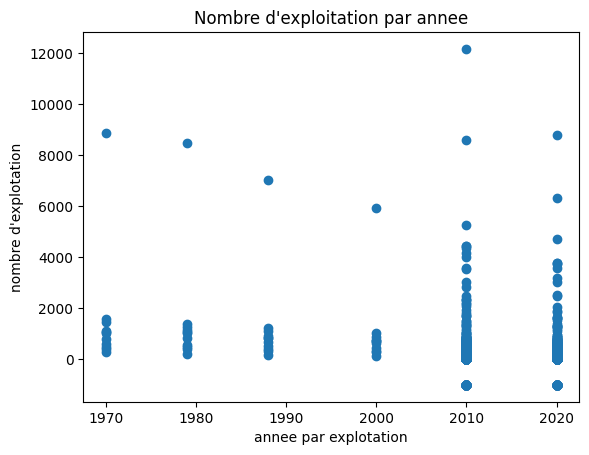

In [12]:
plt.scatter(x=df_rga['annee'] ,y=df_rga['valeur'])

plt.xlabel('annee par explotation')
plt.ylabel("nombre d'explotation")
plt.title("Nombre d'exploitation par annee")

plt.show()

entre 1970 et 2020 on peut sans doute observer la presence des valeurs aberantes, donc pour les valeurs manquantes des valeurs nous allons nous interresser a leur mediane.

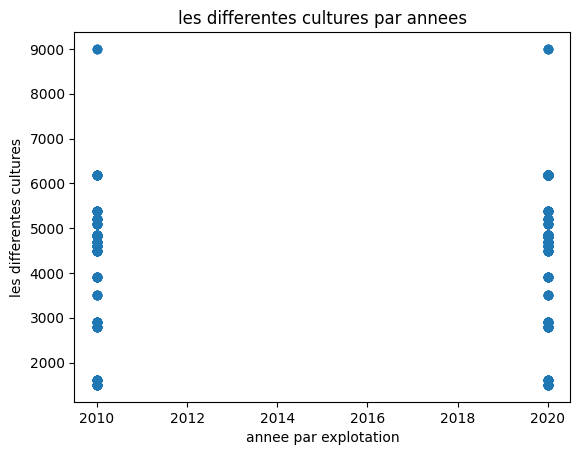

In [ ]:
plt.scatter(x=df_rga['annee'] ,y=df_rga['otefdd_coef17'])

plt.xlabel('annee par explotation')
plt.ylabel("les differentes cultures")
plt.title("les differentes cultures par annees")

plt.show()

on peut observer plusieurs valeurs aberantes

In [4]:
#Variables caterogielles remplacer par la plus grande frequence
df_rga['type'].fillna(df_rga['type'].value_counts().index.tolist()[0], inplace=True)
df_rga['annee'].fillna(df_rga['annee'].value_counts().index.tolist()[0], inplace=True)
df_rga['commune'].fillna(df_rga['commune'].value_counts().index.tolist()[0], inplace=True)

#Variables numericque remplacer par la moyenne
df_rga['sau_tot_ha'].fillna(df_rga['sau_tot_ha'].mean(), inplace=True)
df_rga['sau_moy_ha'].fillna(df_rga['sau_moy_ha'].mean(), inplace=True)
df_rga['sau_ha'].fillna(df_rga['sau_ha'].mean(), inplace=True)
df_rga['ugb'].fillna(df_rga['ugb'].mean(), inplace=True)
df_rga['etp'].fillna(df_rga['etp'].mean(), inplace=True)
df_rga['pbs'].fillna(df_rga['pbs'].mean(), inplace=True)
df_rga['tetes'].fillna(df_rga['tetes'].mean(), inplace=True)
df_rga['surface'].fillna(df_rga['surface'].mean(), inplace=True)
df_rga['irrigation'].fillna(df_rga['irrigation'].mean(), inplace=True)
df_rga['surface_bio'].fillna(df_rga['surface_bio'].mean(), inplace=True)
# df_rga['otefdd_coef17'].fillna(df_rga['otefdd_coef17'].mean(), inplace=True)

#Variables numericque remplacer par le max
df_rga['bio'].fillna(df_rga['bio'].max(), inplace=True)
df_rga['nombre_exploitation_bio'].fillna(df_rga['nombre_exploitation_bio'].max(), inplace=True)

#Variables numericque remplacer par le quantille
df_rga['valeur'].fillna(df_rga['valeur'].median(), inplace = True)
df_rga['otefdd_coef17'].fillna(df_rga['otefdd_coef17'].median(), inplace=True)
df_rga['code_insee'].fillna(df_rga['code_insee'].quantile(0.25), inplace=True)

#Regardons la variable age_5

In [5]:
#Commnecons par l'age nous allons remplcer les valeurs actuelles par la somme des deux valeurs diviser par deux

def replace_age_interval(age_interval):
  if pd.isnull(age_interval):
    return np.nan
  else:
    age_interval = f'{age_interval}'
    # Supprime les parenthèses et divise l'intervalle en deux bornes
    lower_bound, upper_bound = map(lambda x: int(x) if x != 'Inf' else 100, age_interval.strip('(]').split(','))
    # Calcule la somme de l'intervalle divisée par deux
    return (lower_bound + upper_bound) / 2

# Applique la fonction replace_age_interval à chaque valeur de la colonne 'age_5'
df_rga['age_5']=df_rga['age_5'].apply(replace_age_interval)

#gerons ces valeurs manquantes ensuite
df_rga['age_5'].fillna(df_rga['age_5'].mean(), inplace = True )

# Interressons nous a geo_point_2d

In [6]:
df_rga['geo_point_2d'] = df_rga['geo_point_2d'].apply(lambda x: np.nan if pd.isnull(x) else str(x))
df_rga[['latitude', 'longitude']] = df_rga['geo_point_2d'].str.split(',', expand=True).astype(float)


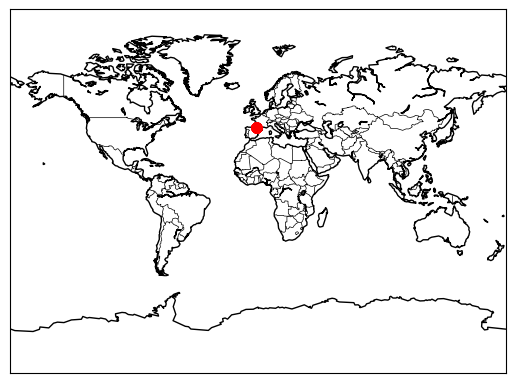

In [7]:
# Création de la carte
map = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Affichage des côtes et des frontières des pays
map.drawcoastlines()
map.drawcountries()


# Conversion des coordonnées en coordonnées de la carte
x, y = map(df_rga['longitude'], df_rga['latitude'])

# Affichage des coordonnées sur la carte
map.plot(x, y, 'ro', markersize=6)

# Affichage de la carte
plt.show()


In [8]:
df_rga['latitude'].fillna(df_rga['latitude'].mean(), inplace = True )
df_rga['longitude'].fillna(df_rga['longitude'].mean(), inplace = True )

In [10]:
# Création de la carte centrée sur une position initiale
map = folium.Map(location=[df_rga['latitude'].max(), df_rga['longitude'].max()], zoom_start=2)

# Ajout des marqueurs pour chaque coordonnée
for index, row in df_rga.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['echelle']).add_to(map)

# Affichage de la carte
map

#Sauvegarde du dataframe

In [ ]:
# # Unquement pour la sauvegarde
# df_rga.to_pickle('/content/drive/MyDrive/dataviz/Data_Rga.pkl')

In [3]:
df_rga = pd.read_pickle("/content/drive/MyDrive/dataviz/Data_Rga.pkl")
df_rga.head(5)

echelle            categorie  \
0  Amikuze  Statut exploitation   
1  Amikuze                 Otex   
2  Amikuze                 Otex   
3  Amikuze                 Otex   
4  Amikuze                 Otex   

                                              type   annee  valeur  \
0                                   autres statuts  2010.0    28.0   
1  combinaisons de granivores (porcins, volailles)  2010.0    27.0   
2                                    bovins viande  2020.0   120.0   
3                                          porcins  2020.0    11.0   
4                    polyculture et/ou polyélevage  2020.0    73.0   

     sau_tot_ha  sau_moy_ha   sau_ha       ugb         etp  ...  irrigation  \
0  22334.180606   19.669191  1092.09  2887.083   39.175221  ... -148.409125   
1  22334.180606   19.669191   938.21  2117.184   41.256737  ... -148.409125   
2  22334.180606   19.669191  5493.60  8951.947  150.016349  ... -148.409125   
3  22334.180606   19.669191   237.50  2890.370   23.952778  ... -148.409125   
4  22334.180606   19.669191  3651.85  3765.148   97.032937  ... -148.409125   

   nombre_exploitation_bio  surface_bio  otefdd_coef17  code_insee  commune  \
0                    304.0   174.560649    4648.888179     64120.0    Gabat   
1                    304.0   174.560649    5374.000000     64120.0    Gabat   
2                    304.0   174.560649    4600.000000     64120.0    Gabat   
3                    304.0   174.560649    5100.000000     64120.0    Gabat   
4                    304.0   174.560649    6184.000000     64120.0    Gabat   

   Geo Shape  geo_point_2d   latitude  longitude  
0        NaN           NaN  43.276624  -1.167625  
1        NaN           NaN  43.276624  -1.167625  
2        NaN           NaN  43.276624  -1.167625  
3        NaN           NaN  43.276624  -1.167625  
4        NaN           NaN  43.276624  -1.167625  

[5 rows x 25 columns]

# Analyse exploratoire

les facteurs qui permet de comprendre le nombre de production agricole
#en gros notre variable cibles est valeur


In [6]:
df_rga.describe()

annee        valeur     sau_tot_ha   sau_moy_ha         sau_ha  \
count  2561.000000   2561.000000    2561.000000  2561.000000    2561.000000   
mean   2015.434205     99.621632   22334.180606    19.669191    2918.642611   
std       6.539160    692.673815    5244.581117     1.537854    4239.083813   
min    1970.000000   -999.000000     267.540000     4.965421    -999.000000   
25%    2010.000000      8.000000   22334.180606    19.669191    2918.642611   
50%    2020.000000     29.000000   22334.180606    19.669191    2918.642611   
75%    2020.000000    101.000000   22334.180606    19.669191    2918.642611   
max    2020.000000  12176.000000  137034.360000    39.744632  105513.280000   

                 ugb          etp            pbs        age_5          tetes  \
count    2561.000000  2561.000000    2561.000000  2561.000000    2561.000000   
mean     5458.289914    96.985814    6626.094265    47.996183   21255.141414   
std     10293.212700   346.331457    7732.296378     6.143960   28082.781142   
min      -999.000000  -999.000000    -999.000000    12.500000    -999.000000   
25%      2736.066000    96.985814    6626.094265    47.996183   21255.141414   
50%      5458.289914    96.985814    6626.094265    47.996183   21255.141414   
75%      5458.289914    96.985814    6626.094265    47.996183   21255.141414   
max    225911.050000  5832.826427  161277.958068    85.000000  716237.000000   

               bio        surface   irrigation  nombre_exploitation_bio  \
count  2561.000000    2561.000000  2561.000000              2561.000000   
mean    148.214369    2966.969416  -148.409125               271.561499   
std     144.918861    4673.361305   190.769105               167.352625   
min    -999.000000    -999.000000  -999.000000              -999.000000   
25%     173.000000    2966.969416  -148.409125               304.000000   
50%     173.000000    2966.969416  -148.409125               304.000000   
75%     173.000000    2966.969416  -148.409125               304.000000   
max     173.000000  124397.910000  2773.040000               304.000000   

       surface_bio  otefdd_coef17    code_insee     latitude    longitude  
count  2561.000000    2561.000000   2561.000000  2561.000000  2561.000000  
mean    174.560649    4648.888179  64138.024209    43.276624    -1.167625  
std     180.811818     649.247472     75.879300     0.044215     0.081427  
min       0.000000    1500.000000  64008.000000    42.994502    -1.765758  
25%     174.560649    4648.888179  64120.000000    43.276624    -1.167625  
50%     174.560649    4648.888179  64120.000000    43.276624    -1.167625  
75%     174.560649    4648.888179  64120.000000    43.276624    -1.167625  
max    6753.490000    9000.000000  64559.000000    43.527595    -0.770350

In [ ]:
df_rga['pbs'].mean()

6626.0942648041155

In [11]:
# Tracer l'histogramme
fig = px.histogram(df_rga, x='valeur', y='pbs')

# Afficher le graphique
fig.show()

<ipython-input-30-3ff8238a307f>:29: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



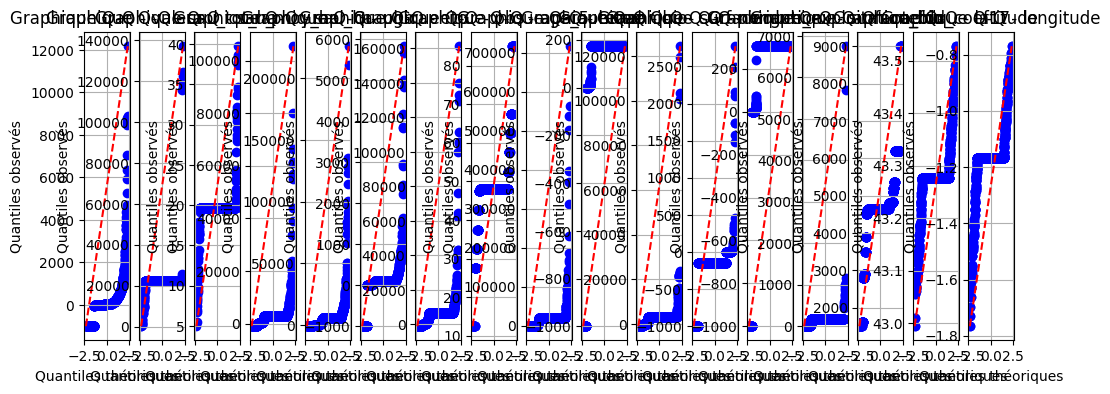

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt


df = df_rga[['valeur', 'sau_tot_ha',
       'sau_moy_ha', 'sau_ha', 'ugb', 'etp', 'pbs', 'age_5', 'tetes', 'bio',
       'surface', 'irrigation', 'nombre_exploitation_bio', 'surface_bio',
       'otefdd_coef17', 'latitude', 'longitude']]

# Obtenir le nombre de variables
num_variables = df.shape[1]

# Créer des sous-graphiques pour les graphiques Q-Q
fig, axes = plt.subplots(1, num_variables, figsize=(12, 4))

# Tracer les graphiques Q-Q pour chaque variable
for i, col in enumerate(df.columns):
    sorted_data = np.sort(df[col])
    theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_data)))
    axes[i].scatter(theoretical_quantiles, sorted_data, color='blue')
    axes[i].plot([np.min(theoretical_quantiles), np.max(theoretical_quantiles)],
                 [np.min(sorted_data), np.max(sorted_data)], color='red', linestyle='--')
    axes[i].set_xlabel('Quantiles théoriques')
    axes[i].set_ylabel('Quantiles observés')
    axes[i].set_title(f'Graphique Q-Q - {col}')
    axes[i].grid(True)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

Il semblerais que les varibles suivent une distrution normale

In [34]:
# Test de Shapiro-Wilk
shapiro_stat, shapiro_pvalue = stats.shapiro(df)
print("Résultats du test de Shapiro-Wilk:")
print("Statistique de test:", shapiro_stat)
print("Valeur p:", shapiro_pvalue)


Résultats du test de Shapiro-Wilk:
Statistique de test: 0.33979928493499756
Valeur p: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



Les résultats du test de Shapiro-Wilk que nous avons obtenus indiquent une statistique de test de 0.33 et une valeur p de 0.0. La valeur p obtenue est très faible (inférieure à 0,05), ce qui suggère un rejet de l'hypothèse nulle selon laquelle les données suivent une distribution normale.

Il est important de noter que le test de Shapiro-Wilk peut être moins précis pour des échantillons de taille supérieure à 5000, comme indiqué par le message d'avertissement. Cela signifie que la valeur p peut ne pas être aussi précise pour un échantillon de données de grande taille.

<Axes: >

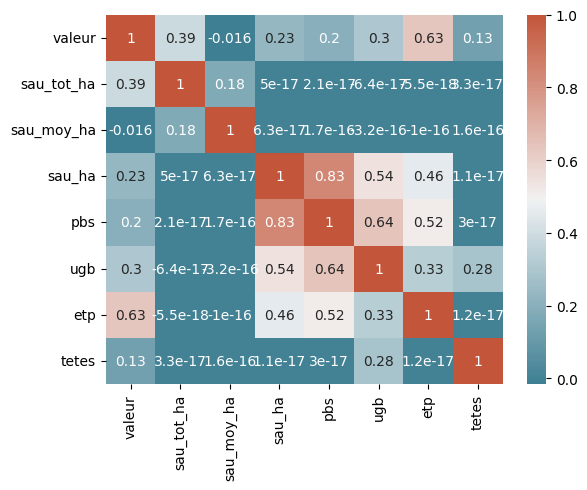

In [ ]:
#Analyse multivarier
#Calculer la matrice de corrélation
correlation_matrix = df_rga[['valeur','sau_tot_ha','sau_moy_ha','sau_ha','pbs','ugb','etp','tetes']].corr()


sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))

<Axes: xlabel='etp', ylabel='pbs'>

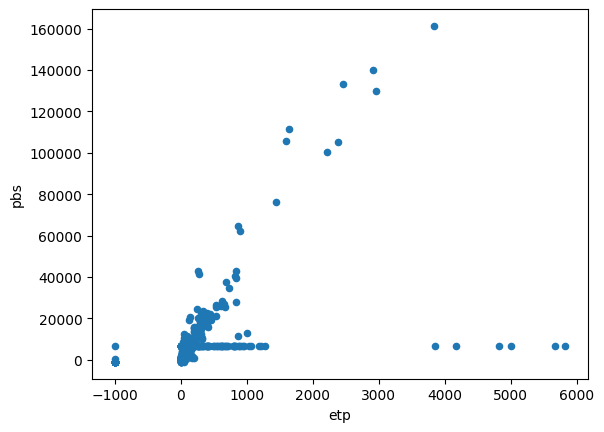

In [ ]:
df_rga.plot(kind='scatter', x='etp', y='pbs')


Le travail en temps plien (etp) et la valeur de la production potentielle par hectare ou par tête d'animal (pbs) sont effectivements correles

<Axes: xlabel='ugb', ylabel='pbs'>

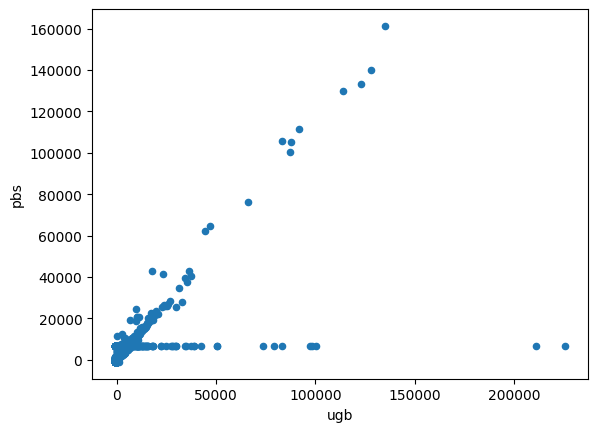

In [ ]:
df_rga.plot(kind='scatter', x='ugb', y='pbs')


unite de gros betail (ugb) croit avec la valeur de la production potentielle par hectare ou par tête d'animal

<Axes: xlabel='sau_ha', ylabel='pbs'>

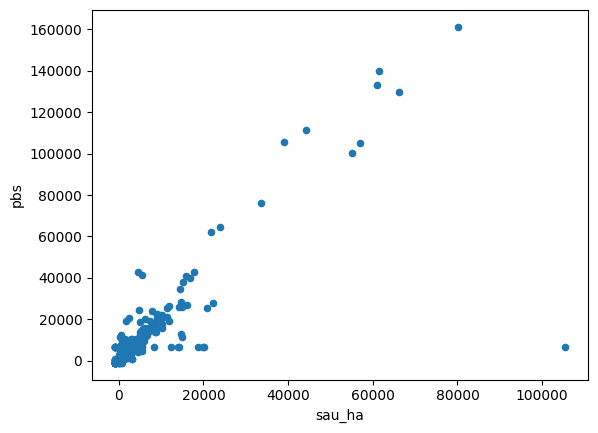

In [ ]:
df_rga.plot(kind='scatter', x='sau_ha', y='pbs')


la superficie par hectare agricole utiliser croit avec la valeur de la production potentielle par hectare ou par tête d'animal

<Axes: xlabel='valeur', ylabel='pbs'>

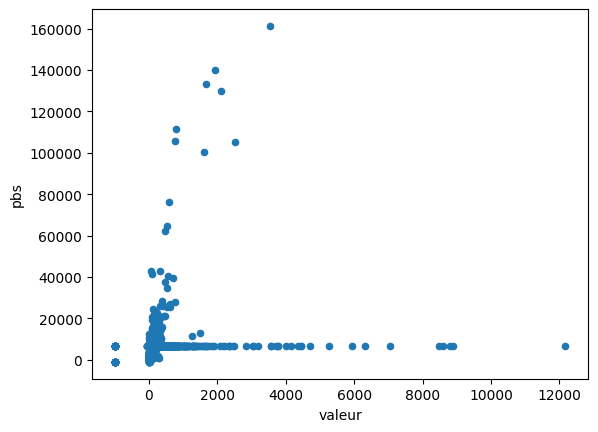

In [ ]:
df_rga.plot(kind='scatter', x='valeur', y='pbs')


les valeurs explique la croissance de la production

<Axes: >

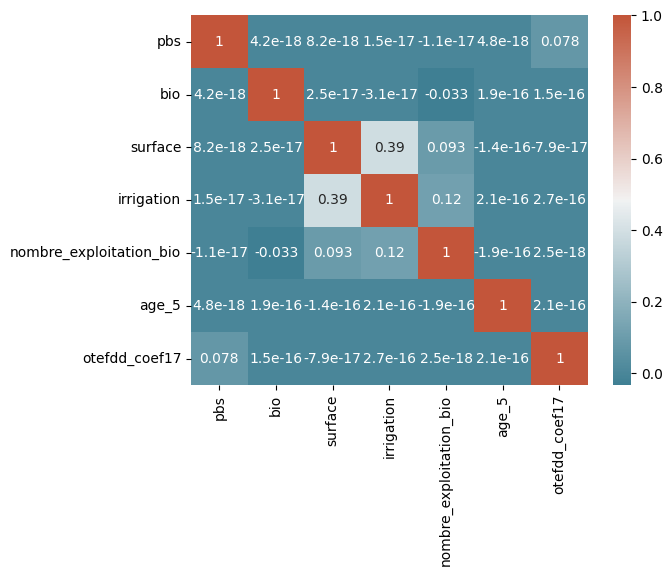

In [ ]:
#Analyse multivarier
#Calculer la matrice de corrélation2
correlation_matrix2 = df_rga[['pbs','bio','surface','irrigation','nombre_exploitation_bio','age_5','otefdd_coef17']].corr()


sns.heatmap(correlation_matrix2, xticklabels=correlation_matrix2.columns, yticklabels=correlation_matrix2.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))

<Axes: xlabel='annee', ylabel='pbs'>

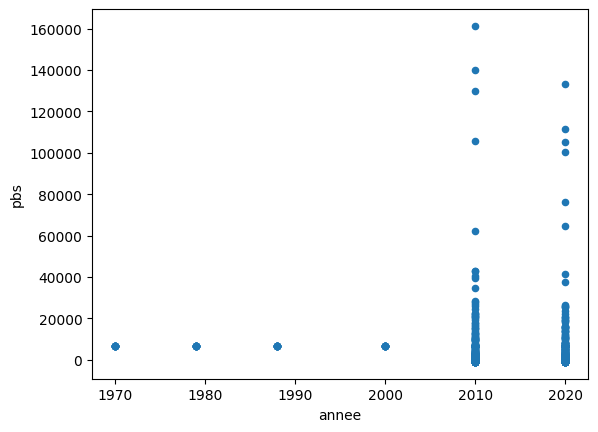

In [ ]:
df_rga.plot(kind='scatter', x='annee', y='pbs')


<Axes: >

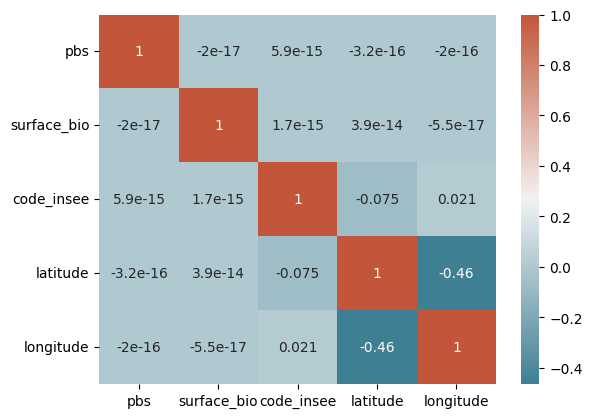

In [ ]:
# ,
#Analyse multivarier
#Calculer la matrice de corrélation2
correlation_matrix3 = df_rga[['pbs','surface_bio','code_insee', 'latitude','longitude']].corr()


sns.heatmap(correlation_matrix3, xticklabels=correlation_matrix3.columns, yticklabels=correlation_matrix3.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))

Nom_Expliquer = ['surface_bio','code_insee', 'latitude','longitude','bio','surface','irrigation','nombre_exploitation_bio','age_5']
il semblerait que la liste Nom_Expliquer contient des variables qui ne contribut pas de facon significative a la production agricole du pays de basque.:

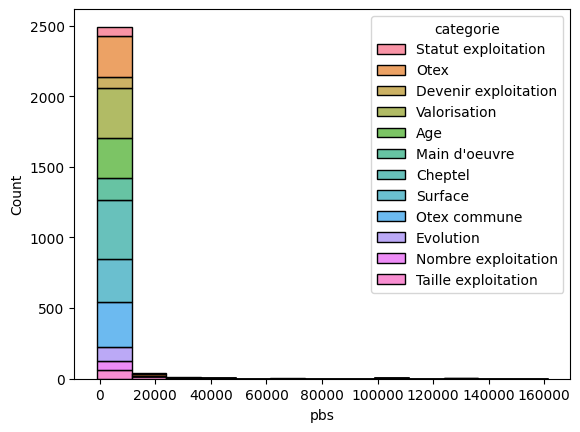

In [10]:
# Tracer l'histogramme
sns.histplot(data=df_rga, x='pbs', hue='categorie', multiple='stack')

# Afficher le graphique
plt.show()

In [ ]:
# Tracé du graphe
fig = px.scatter(df_rga, x='echelle', y='sau_moy_ha', color='annee', labels={'echelle': 'Échelle', 'sau_moy_ha': 'Moyenne agricole utiliser', 'annee': 'Annee'})
fig.update_traces(mode='markers')
fig.update_layout(width=1000, height=700)
fig.show()


On peut remarquer que depuis 1970 jusqu'en 2020, le pays de Bidache a presque toujours eu, une superficie agricole utiliser plus grande que les autres pôles soit 39.74 ha. Ensuite vient les pôles Amikuze (38,65 ha), Soule Xiberoa (38.44 ha).

In [ ]:
fig = px.scatter(df_rga, x='echelle', y='pbs', color='annee', labels={'echelle': 'Échelle', 'pbs': "la valeur de la production potentielle par hectare ou par tête d'animal", 'annee': 'Annee'})
fig.update_traces(mode='markers')
fig.update_layout(width=1000, height=700)
fig.show()

cette figure qui nous montre l'evolution de la production par pôle selon les annees, ainsi, nous pouvons en deduire que le pole de Garazi Biagorri a eu la plus grande production de l'histoire du pays de basque en 2010 avec une production potentielle par hectare ou par tete d'animale de plus de 40 milles. parilleurs, nous observons une croisance pour les autres poles qui on pu atteindre en 2020 plus de 20 milles. cependant, nous pouvons affirmer que lorsqu'on regroupe tous les poles de du pays de basque nous constantons qu'ils ont eu une production de plus de 166 milles en 2010 et une production en baisse de plus de 133 milles en 2020.

In [9]:
fig = px.scatter(df_rga, x='type', y='pbs', color='annee', labels={'type': 'Type', 'pbs': "la valeur de la production potentielle par hectare ou par tête d'animal", 'annee': 'Annee'})
fig.update_traces(mode='markers')
fig.update_layout(width=1000, height=700)
fig.show()

De facon global il semblerai que les types par production on connu une baisse au fil des annnees soit la plus importante production de plus de 161 milles en 2010 contre plus de 105 mille production en 2020 .
Cependant, il semblerai que les types d'agriculture tels que la l'exploitation individuelle, ouvin ou caprin, petite et les moyennes ont une valeur de production potentielle par hectare ou par tete d'animal tres importante que les autres types. Par ailleurs, nous pouvons soupconner qu'il serait judicieux d'investir dans les types d'exploitation individuelle,  ouvin ou caprin, petites et moyennes, malgre une baisse tres considerables de la production en 10 ans.

In [ ]:
fig = px.scatter(df_rga, x = 'categorie', y = 'pbs', color = 'annee', labels={'categorie':"les differentes categories d'agriculture", 'pbs':"valeur de la production potentielle", "annee":"Annee"})
fig.update_traces(mode= "markers")
fig.update_layout(width = 1000, height=700)
fig.show()

Tout comme les analyses precedentes, nous constatons que la production est en baisse au fil des annees. cependant, nous pouvons dire que les categories tels que le statut d'exploitation, les Orientations technico-économiques de l'exploitation (Otex) et la taille d'exploitation explique semble expliquer significativement la production agricole.

In [ ]:
fig = px.scatter(df_rga, x='commune', y='pbs', color='annee', labels={"commune":"Les Communes", "pbs":"Valeur de la production potentielle", "annee":"Annee"})
fig.update_traces(mode="markers")
fig.update_layout(width=800, height=600)
fig.show()

Il semblerais que globalement les communes n'explique pas significativement la production agricole au fil des annnees.

#Definition de la pipeline

In [20]:
# df_rga.rename(columns={'Geo Shape':"Geo_Shape"},inplace = True)
df_rga.rename(columns={'type':"Types"},inplace = True)



In [22]:
# Read the data
df_rga_New = df_rga.copy()
# df_rga_New.drop(columns = ['latitude', 'longitude'], axis = 1, inplace = True)

# # Remove rows with missing target
df_rga_New.dropna(axis=0, subset=['pbs'], inplace=True)

# Separate target from predictors
y = df_rga_New.pbs
X = df_rga_New.drop(['pbs'], axis=1)

# Break off validation set from training data
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y,
                                                                train_size=0.8,
                                                                test_size=0.2,
                                                                random_state=42)

# integer_features = list(X.columns[X.dtypes == 'int64'])
# #continuous_features = list(X.columns[X.dtypes == 'float64'])
# categorical_features = list(X.columns[X.dtypes == 'object'])
categorical_features = X.select_dtypes(include="object").columns.tolist()
integer_features = X.select_dtypes(exclude="object").columns.tolist()

# Keep selected columns only
my_cols = categorical_features + integer_features
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

integer_transformer = Pipeline(steps = [
   ('imputer', SimpleImputer(strategy = 'most_frequent')),
   ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
   transformers=[
       ('ints', integer_transformer, integer_features),
       ('cat', categorical_transformer, categorical_features)])

base = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', RandomForestRegressor())])

# Preprocessing of training data, fit model
base.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['annee', 'valeur',
                                                   'sau_tot_ha', 'sau_moy_ha',
                                                   'sau_ha', 'ugb', 'etp',
                                                   'age_5', 'tetes', 'bio',
                                                   'surface', 'irrigation',
                                                   'nombre_exploitation_bio',
                                                   'surface_bio',
                                                   'otefdd_coef17',
                                                   'code_insee', 'latitude',
                                                   'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['echelle', 'categorie',
                                                   'Types', 'commune',
                                                   'Geo_Shape',
                                                   'geo_point_2d'])])),
                ('regressor', RandomForestRegressor())])

In [23]:
# Définissez le nom du fichier dans lequel vous souhaitez sauvegarder le modèle
filename = '/content/drive/MyDrive/dataviz/modele_rf.pickle'

# Utilisez pickle pour sauvegarder le modèle
with open(filename, 'wb') as file:
    pickle.dump(base, file)

filename2 = '/content/drive/MyDrive/dataviz/modele_rf.pickle'

# Utilisez pickle pour sauvegarder le modèle
with open(filename2, 'wb') as file:
    pickle.dump(base, file)


filename3 = '/content/drive/MyDrive/dataviz/modele_rf_ful.pickle'

# Utilisez pickle pour sauvegarder le modèle
with open(filename3, 'wb') as file:
    pickle.dump(base, file)

In [24]:
# Obtenir les prédictions de probabilité ou
#prediction des donnees de test
y_pred = base.predict(X_test)


# Évaluation du modèle
score_rf = base.score(X_test, y_test)
# # Calculer le score R²
# r2 = r2_score(y_test, y_pred)
# print("R² Score:", r2)

print("Prédictions :", y_pred)
print(" R² Score_rf :", score_rf)

Prédictions : [ 6.62609426e+03  6.62609426e+03  6.66527560e+03  2.14449648e+02
  6.66858353e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03  2.16370602e+02  6.62609426e+03  1.13832769e+03
  6.61806964e+03  1.49999742e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03  6.62609426e+03  5.57577424e+03  2.18373902e+02
  6.62609426e+03  6.62609426e+03  6.62609426e+03  6.60695798e+03
  6.64497690e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03 -5.88391457e+01 -9.99000000e+02  6.62609426e+03
  6.62609426e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.57748031e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  6.62609426e+03  6.62609426e+03  6.62609426e+03  6.62609426e+03
  2.32358789e+03  6.62609426e+03  6.62609426e+03 -9.99000000e+02
  6.6260942

In [ ]:
modele_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear', LinearRegression())
])


modele_linear.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['annee', 'valeur',
                                                   'sau_tot_ha', 'sau_moy_ha',
                                                   'sau_ha', 'ugb', 'etp',
                                                   'age_5', 'tetes', 'bio',
                                                   'surface', 'irrigation',
                                                   'nombre_exploitation_bio',
                                                   'surface_bio',
                                                   'otefdd_coef17',
                                                   'code_insee', 'latitude',
                                                   'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['echelle', 'categorie',
                                                   'type', 'commune',
                                                   'Geo Shape',
                                                   'geo_point_2d'])])),
                ('linear', LinearRegression())])

In [ ]:
y_pred_linear = modele_linear.predict(X_test)
score_linear = modele_linear.score(X_test, y_test)
print(" R² Score_linear:", score_linear)

 R² Score_linear: 0.5429715784126896


In [ ]:
modele_Ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])


modele_Ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['annee', 'valeur',
                                                   'sau_tot_ha', 'sau_moy_ha',
                                                   'sau_ha', 'ugb', 'etp',
                                                   'age_5', 'tetes', 'bio',
                                                   'surface', 'irrigation',
                                                   'nombre_exploitation_bio',
                                                   'surface_bio',
                                                   'otefdd_coef17',
                                                   'code_insee', 'latitude',
                                                   'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['echelle', 'categorie',
                                                   'type', 'commune',
                                                   'Geo Shape',
                                                   'geo_point_2d'])])),
                ('ridge', Ridge())])

In [ ]:
y_pred_ridge = modele_Ridge.predict(X_test)
score_ridge = modele_Ridge.score(X_test, y_test)
print(" R² Score_ridge:", score_ridge)

 R² Score_ridge: 0.5713313395293032


Dans cette rubrique nous disons que le meilleur model est celui du rendom forest avec un coeficient de determiniation tres superieures au autres models de regresions. soit $89%$

Evaluation

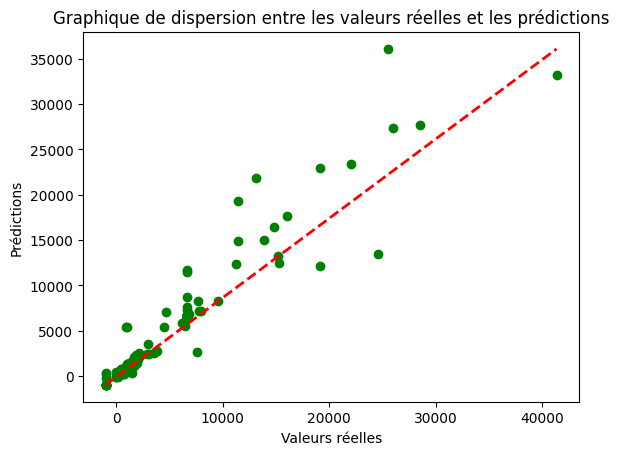

In [ ]:
#graphique de dispersion entre les valeurs réelles et les prédictions pour évaluer visuellement la performance de votre modèle.
# Tracer le graphique de dispersion
plt.scatter(y_test, y_pred, color = 'green', label = 'Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r--', lw=2)  # Ligne diagonale pour la comparaison parfaite
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Graphique de dispersion entre les valeurs réelles et les prédictions')
plt.show()


In [ ]:
# Créer la figure
fig = go.Figure()

# Ajouter les points de prédiction
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Prédictions',
    marker=dict(color='green')
))

#Ajouter les valeurs réelles
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_test,
    mode='markers',
    name='Valeurs réelles',
    marker=dict(color='blue')
    ))

# Ajouter la ligne de comparaison parfaite
fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Comparaison parfaite',
    line=dict(color='red', dash='dash')
))


# Mettre en forme le layout
fig.update_layout(
    title='Graphique de dispersion entre les valeurs réelles et les prédictions',
    xaxis=dict(title='Valeurs réelles'),
    yaxis=dict(title='Prédictions'),
    showlegend=True
)

# Afficher la figure
fig.show()
